## **Dogs vs Cats Fine Tuning Activity**

In this activity, you have to improve the model and make sure that it won't overfit/ underfit.

Use the following loss evaluation citerion:


> **Overfitting** if training loss << validation loss


> **Underfitting** if training loss >> validation loss


> **Model is fine** if training loss is approximately equal to validation loss

Also, you need increase the model accuracy by applying what you learned from the previous activities. Some of the parameters you can change are the epochs, steps per epoch, the optimizer algorithm, etc.

**Download the dataset**

In [ ]:
import tensorflow as tf
import os
 
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" #replace a with the link provided in The Dataset description
 
dl_dataset = tf.keras.utils.get_file(
    fname = './'+os.path.basename(dataset_url),
    origin = dataset_url,
    cache_subdir = 'dataset',
    extract = True,
    cache_dir = '.'
)
 
print("Data is downloaded: {}".format(dl_dataset)+'\n'+"Data is successfully extracted.")

68616192/68606236 [==============================] - 0s 0us/step
Data is downloaded: ./dataset/./cats_and_dogs_filtered.zip
Data is successfully extracted.


**Set Directories**

In [ ]:
base_dir = 'dataset/cats_and_dogs_filtered' #replace a with the directory up to two levels; use forward slash as separator
 
train_dir = os.path.join(base_dir, 'train') #replace b with the folder name specified by the variable
validation_dir = os.path.join(base_dir, 'validation') #replace c with the folder name specified by the variable
 
train_cats_dir = os.path.join(train_dir, 'cats') #replace d with the folder name specified by the variable
train_dogs_dir = os.path.join(train_dir, 'dogs') #replace e with the folder name specified by the variable
 
validation_cats_dir = os.path.join(validation_dir, 'cats') #replace f with the folder name specified by the variable
validation_cats_dir = os.path.join(validation_dir, 'dogs') #replace g with the folder name specified by the variable

**Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Preprocessing Train Dataset
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(  #
    train_dir,
    target_size=(150, 150), #resizes all images to 150 x 150
    batch_size=20,
    class_mode='binary'
)
# Preprocessing Validation Dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), #resizes all images to 150 x 150
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Build your Convolutional Neural Network Model**

In [ ]:
## insert code here ##

img_input = tf.keras.layers.Input(shape=(150, 150, 3))
 
#convolutional layer
x = tf.keras.layers.SeparableConv2D(64, (3,3), activation='softmax')(img_input)
x = tf.keras.layers.AveragePooling2D((2,2))(x) #pooling layer
 
#adding another TWO convolutional layer; changing 'relu' activation functions into
x = tf.keras.layers.SeparableConv2D(128, (3,3), activation='softmax')(x)
x = tf.keras.layers.AveragePooling2D((2,2))(x)
 
x = tf.keras.layers.SeparableConv2D(128, (3,3), activation='softmax')(x)
x = tf.keras.layers.AveragePooling2D((2,2))(x)
 
x = tf.keras.layers.Flatten()(x) #flattening
 
x = tf.keras.layers.Dense(512, activation='softmax')(x) #fully connected layer

x = tf.keras.layers.Dropout(0.8)(x) 
 
output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #output layer
 
model = tf.keras.Model(img_input, output)

**Display Model Summary**

In [ ]:
## insert code here ##
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 separable_conv2d_3 (Separab  (None, 148, 148, 64)     283       
 leConv2D)                                                       
                                                                 
 average_pooling2d_2 (Averag  (None, 74, 74, 64)       0         
 ePooling2D)                                                     
                                                                 
 separable_conv2d_4 (Separab  (None, 72, 72, 128)      8896      
 leConv2D)                                                       
                                                                 
 average_pooling2d_3 (Averag  (None, 36, 36, 128)      0         
 ePooling2D)                                                 

**Model Training**

In [ ]:
## insert code here ##

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch = 100, # total train images/batch size
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 1)

Epoch 1/50
100/100 [==============================] - 33s 201ms/step - loss: 0.6938 - acc: 0.4885 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
100/100 [==============================] - 20s 200ms/step - loss: 0.6953 - acc: 0.4950 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/50
100/100 [==============================] - 20s 198ms/step - loss: 0.6941 - acc: 0.5010 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 4/50
100/100 [==============================] - 20s 198ms/step - loss: 0.6925 - acc: 0.4985 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/50
100/100 [==============================] - 20s 199ms/step - loss: 0.6925 - acc: 0.5185 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/50
100/100 [==============================] - 20s 198ms/step - loss: 0.6945 - acc: 0.4920 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/50
100/100 [==============================] - 20s 200ms/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/50
100/100 [==============================] - 2

**Save your Model**

In [ ]:
## insert code here ##
model.save('DogsvsCatsModel.h5') #ex. cats_and_dogs.h5


**Show Model Visualization**

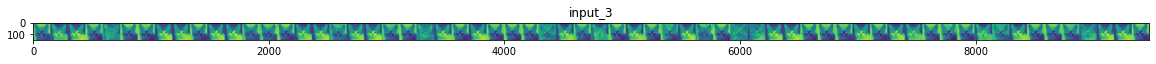

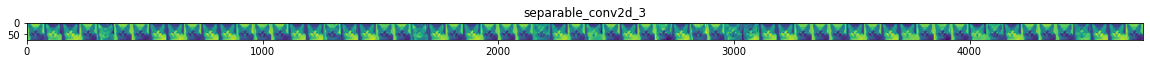

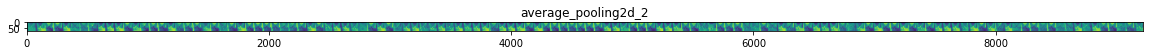

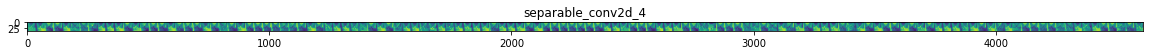

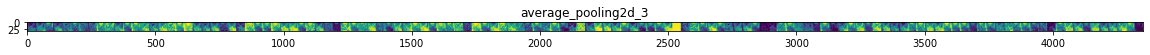

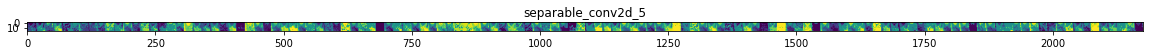

In [ ]:
## insert code here ##

import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline
from matplotlib import pyplot as plt
 
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
 
#select a random image of a dog or cat from the training datasets
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
 
img = load_img(img_path, target_size=(150, 150))  #Python Image Library
x = img_to_array(img)  #Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  #Numpy array with shape (1, 150, 150, 3)
 
x /= 255
 
#creates a new model that will take an image input and output intermediate
#representations for all layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.Model(img_input, successive_outputs)
 
#runs the image through the network
successive_feature_maps = visualization_model.predict(x)
 
#holds the names of the layers
layer_names = [layer.name for layer in model.layers]
 
#displays the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    #just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    #feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # tiles the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      #postprocess the feature for better visualization
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # tiles each filter into big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    #displays the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Use Model to Predict an Image**

Prediction: Cat


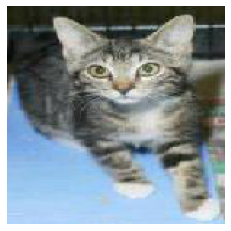

In [ ]:
## insert code here ##

from tensorflow.keras.preprocessing import image
 
predict_image = image.load_img(random.choice(cat_img_files + dog_img_files), target_size = (150, 150))
 
plt.imshow(predict_image)
plt.axis('off')
 
test_image = image.img_to_array(predict_image)
test_image = np.expand_dims(test_image, axis = 0)
 
result = model.predict(test_image)
 
train_generator.class_indices
 
if result[0][0] == 1:
  prediction = 'Prediction: Dog'
else:
  prediction = 'Prediction: Cat'
 
print(prediction)

**Plot Model Performance**

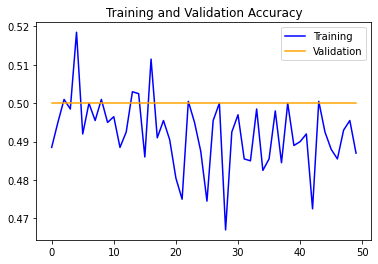

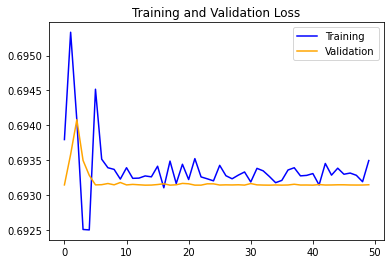

In [ ]:
## insert code here ##

#retrieve a list of accuracy results on training and validation datasets
acc = history.history['acc']
val_acc = history.history['val_acc']
 
#retrieve a list of loss results on training and validation datasets
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc)) #gets number of epochs
 
def summarize_diagnostics(history):
    
    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, color = 'blue', label = 'Training')
    plt.plot(epochs, val_acc, color = 'orange', label = 'Validation')
    plt.title('Training and Validation Accuracy')
    plt.legend()
 
    plt.figure()
 
    # Plot training and validation loss per epoch
    plt.plot(epochs, loss, color = 'blue', label = 'Training')
    plt.plot(epochs, val_loss, color = 'orange', label = 'Validation')
    plt.title('Training and Validation Loss')
    plt.legend()
    
summarize_diagnostics(history)


**Display Training and Testing Accuracy**

In [ ]:
## insert code here ##

loss, accuracy = model.evaluate(train_generator, steps=len(train_generator), verbose=1)
print("Training Accuracy: {:.5f}".format(accuracy))
print("Training Loss: {:.5f}".format(loss))
 
val_loss, val_accuracy = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print("Testing Accuracy:  {:.5f}".format(val_accuracy))
print("Testing Loss: {:.5f}".format(val_loss))

100/100 [==============================] - 16s 164ms/step - loss: 0.4224 - acc: 0.8040
Training Accuracy: 0.80400
Training Loss: 0.42244
50/50 [==============================] - 3s 67ms/step - loss: 0.4696 - acc: 0.7940
Testing Accuracy:  0.79400
Testing Loss: 0.46957


# **Another Parameter**

In [ ]:
model2 = tf.keras.Model(img_input, output)
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history2 = model2.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 1)

Epoch 1/100
100/100 [==============================] - 22s 212ms/step - loss: 0.4547 - acc: 0.7870 - val_loss: 0.4728 - val_acc: 0.8000
Epoch 2/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4500 - acc: 0.8015 - val_loss: 0.4687 - val_acc: 0.7960
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4361 - acc: 0.7935 - val_loss: 0.4704 - val_acc: 0.7830
Epoch 4/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4380 - acc: 0.7970 - val_loss: 0.4390 - val_acc: 0.8090
Epoch 5/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4481 - acc: 0.7815 - val_loss: 0.4536 - val_acc: 0.8130
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 0.4267 - acc: 0.8000 - val_loss: 0.4786 - val_acc: 0.7920
Epoch 7/100
100/100 [==============================] - 21s 205ms/step - loss: 0.4306 - acc: 0.7995 - val_loss: 0.4919 - val_acc: 0.7740
Epoch 8/100
100/100 [===========================

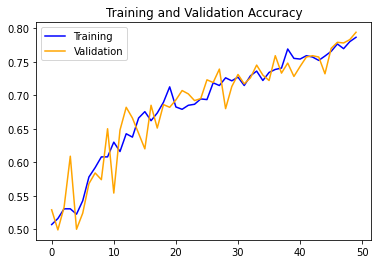

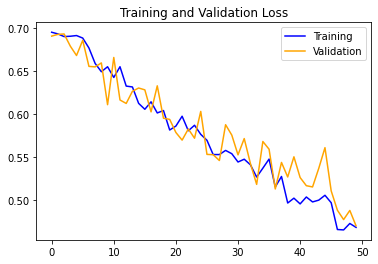

In [ ]:
#retrieve a list of accuracy results on training and validation datasets
acc = history.history['acc']
val_acc = history.history['val_acc']
 
#retrieve a list of loss results on training and validation datasets
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc)) #gets number of epochs

summarize_diagnostics(history)

In [ ]:
loss, accuracy = model.evaluate(train_generator, steps=len(train_generator), verbose=1)
print("Training Accuracy: {:.5f}".format(accuracy))
print("Training Loss: {:.5f}".format(loss))
 
val_loss, val_accuracy = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print("Testing Accuracy:  {:.5f}".format(val_accuracy))
print("Testing Loss: {:.5f}".format(val_loss))

100/100 [==============================] - 17s 167ms/step - loss: 0.1948 - acc: 0.9200
Training Accuracy: 0.92000
Training Loss: 0.19478
50/50 [==============================] - 3s 69ms/step - loss: 0.4121 - acc: 0.8710
Testing Accuracy:  0.87100
Testing Loss: 0.41212
